In [1]:
import networkx as nx
import matplotlib.pyplot as plt
G1 =nx.read_edgelist('edge_list.txt', create_using = nx.Graph(), nodetype=int)

In [2]:
betCent = nx.betweenness_centrality(G1, normalized=True, endpoints=True)

In [3]:
degreeCent = nx.degree_centrality(G1)

In [4]:
closenessCent = nx.closeness_centrality(G1, u=None, distance=None, wf_improved=True)

In [5]:
from networkx import eigenvector_centrality
from networkx import load_centrality

In [6]:
EigCent= eigenvector_centrality(G1, max_iter=100, tol=1e-06, nstart=None, weight=None)

In [7]:
LoadCentr=load_centrality(G1, v=None, cutoff=None, normalized=True, weight=None)

In [8]:
#dictionary with all the results for each node of all the centrality measures applied 
final_dict= dict()
for x in betCent.keys():
    new_dic=dict()
    new_dic['betCent']= betCent[x]
    new_dic['degreeCent']=degreeCent[x]
    new_dic['closenessCent']=closenessCent[x]
    new_dic['eigCent']=EigCent[x]
    new_dic['loadCent']= LoadCentr[x]
    final_dict[x]=new_dic

In [9]:
import pandas as pd
df = pd.DataFrame(final_dict)
df = df.transpose()

In [10]:
df

,betCent,degreeCent,closenessCent,eigCent,loadCent
100,0.019615,0.070905,0.315830,0.003435,0.015008
101,0.006270,0.031785,0.283831,0.001452,0.001334
102,0.005623,0.039120,0.269256,0.001433,0.000844
103,0.011580,0.063570,0.294033,0.002439,0.006604
104,0.006071,0.041565,0.268197,0.001513,0.001264
...,...,...,...,...,...
89,0.004882,0.009780,0.241014,0.000256,0.000005
91,0.011262,0.051345,0.273396,0.001982,0.006504
96,0.005200,0.036675,0.256587,0.001316,0.000346
99,0.005198,0.034230,0.261342,0.001096,0.000413


In [11]:
import matplotlib.ticker

C:\Users\marta\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


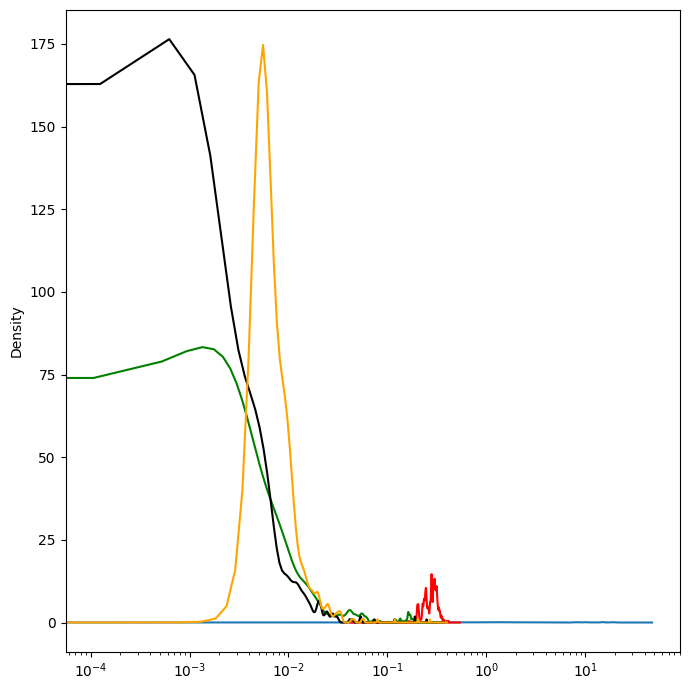

In [20]:
plt.rcParams["figure.figsize"] = [7, 7]
plt.rcParams["figure.autolayout"] = True

fig, ax = plt.subplots()
df['degreeCent'].value_counts().plot( kind='kde', ax=ax, logx=True, bw_method=0.05)
df['closenessCent'].plot( kind='kde', ax=ax, logx=True, bw_method=0.05, color='red')
df['eigCent'].plot(kind='kde', ax=ax, logx=True, bw_method=0.05, color='green')
df['loadCent'].plot(kind='kde', ax=ax, logx=True, bw_method=0.05, color='black')
df['betCent'].plot(kind='kde', ax=ax, logx= True, bw_method=0.05, color = 'orange')
plt.show()

<p>This is the graph showing the probability density functions obtained through the same method as before, that is the Pandas method <b>'kde'</b>, passing as input all the results obtained for each of the five centrality measures applied to the real-world network INFECTIOUS. In this case we decided to set the scalar bandwidth equal to 0.05, a larger value than the one used for the vizualization of the graph derived from the Facebook Ego dataset, because also the results we gathered from the execution of the centrality measures are higher. Consequently, for this graph the choice of a very small bandwidth value would have resulted in over-fitting.</p>

Also in this case:
<ul>
    <li>the blue plot represents the PDF of the degree centrality,</li>
    <li>the red plot represents the PDF of the closeness centrality,</li>
    <li>the green plot represents the PDF of the eigenvector centrality,</li>
    <li>the orange plot represents the PDF of the betweenness centrality,</li>
    <li>the black plot represents the PDF of the load centrality</li>
</ul>
    

<p>We can extrapolate some interesting information by looking at the graph:
<ul>
    <li>also in this case we can notice a strong difference between the two distributions of the closeness centrality and degree centrality: while the blue plot is very close to be a line, there isn't a peak in density and the distribution of the values is really spread, the red plot shows the highest concentration of values more or less in the same density area; there are some peaks but we can say that the closeness centrality nodes' values do not vary a lot one from another;</li>
    <li>the load centrality and the eigenvector centrality distributions have a similar tendency: starting from an high density level for small values, the distributions reach soon their highest peak and then they decrease rapidly;</li>
    <li>the tendency of the betweenness centrality distribution is curious: for very small values the curve tendes to 0, then it reaches very soon its highest peak (for values a bit minor of 0,01) and decreases very quickly with some minor peaks for higher betweenness centrality values.</li>
</ul>
</p>